Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Class names: ['class_0' 'class_1' 'class_2']
Class distribution: [59 71 48]
KNN Accuracy with k=1: 0.9722
KNN Accuracy with k=5: 0.9722
KNN Accuracy with k=11: 1.0000
KNN Accuracy with k=15: 1.0000
KNN Accuracy with k=21: 1.0000


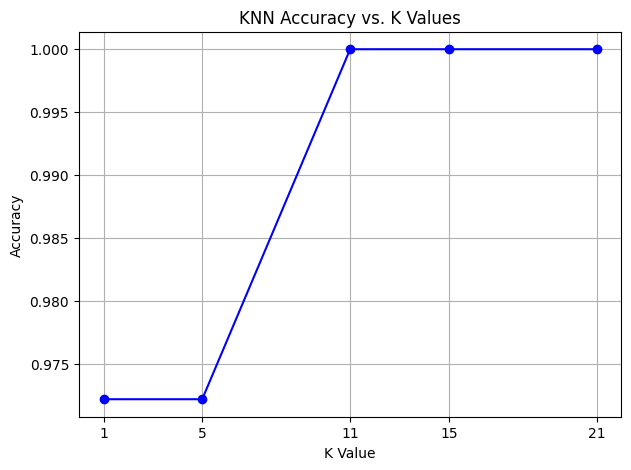

RNN Accuracy with radius=350 (scaled=3.50): 1.0000
RNN Accuracy with radius=400 (scaled=4.00): 0.9444
RNN Accuracy with radius=450 (scaled=4.50): 0.9167
RNN Accuracy with radius=500 (scaled=5.00): 0.8611
RNN Accuracy with radius=550 (scaled=5.50): 0.8333
RNN Accuracy with radius=600 (scaled=6.00): 0.7500


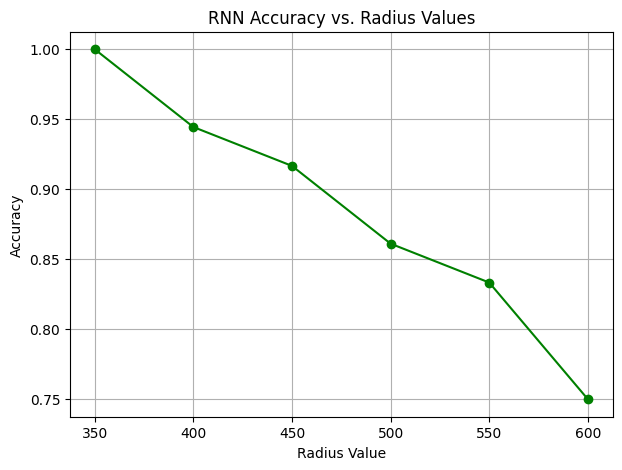

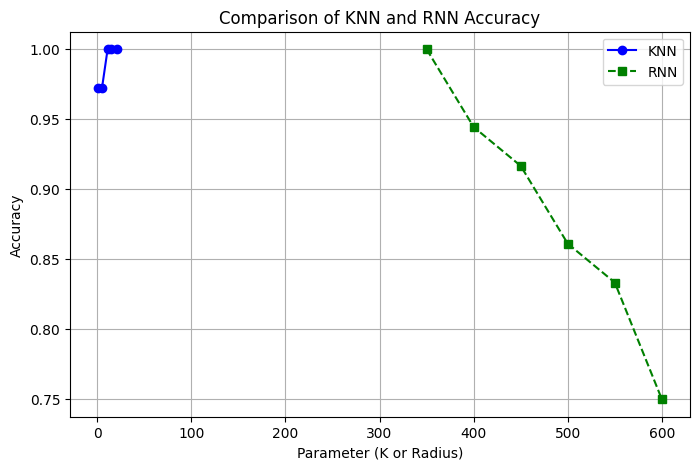

In [ ]:
# Name: Bishesh
# Course: MSCS 634 - Data Mining
# Lab 2: Classification Using KNN and RNN Algorithms
# Date: November 3, 2025

# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 2: Load Dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
class_names = wine.target_names

# Basic Exploration
print("Feature names:", feature_names)
print("Class names:", class_names)
print("Class distribution:", np.bincount(y))

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: K-Nearest Neighbors (KNN)

k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"KNN Accuracy with k={k}: {acc:.4f}")

# Plot KNN Accuracy
plt.figure(figsize=(7,5))
plt.plot(k_values, knn_accuracies, marker='o', linestyle='-', color='blue')
plt.title('KNN Accuracy vs. K Values')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Step 4: Radius Neighbors Classifier (RNN)

radius_values = [350, 400, 450, 500, 550, 600]  # distances will be scaled
rnn_accuracies = []

# To scale radius for standardized data, divide by 100 (approximation)
scaled_radii = [r/100 for r in radius_values]

for r, sr in zip(radius_values, scaled_radii):
    rnn = RadiusNeighborsClassifier(radius=sr, outlier_label=1)
    rnn.fit(X_train, y_train)
    y_pred = rnn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rnn_accuracies.append(acc)
    print(f"RNN Accuracy with radius={r} (scaled={sr:.2f}): {acc:.4f}")

# Plot RNN Accuracy
plt.figure(figsize=(7,5))
plt.plot(radius_values, rnn_accuracies, marker='o', linestyle='-', color='green')
plt.title('RNN Accuracy vs. Radius Values')
plt.xlabel('Radius Value')
plt.ylabel('Accuracy')
plt.xticks(radius_values)
plt.grid(True)
plt.show()

# Step 5: Comparison and Observations

plt.figure(figsize=(8,5))
plt.plot(k_values, knn_accuracies, marker='o', linestyle='-', label='KNN', color='blue')
plt.plot(radius_values, rnn_accuracies, marker='s', linestyle='--', label='RNN', color='green')
plt.title('Comparison of KNN and RNN Accuracy')
plt.xlabel('Parameter (K or Radius)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
